## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개
* 학습 데이터셋 : train.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* label : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [302]:
from bs4 import BeautifulSoup
from openpyxl import Workbook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **나.  학습데이터 불러오기**

In [434]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# <b>Step 1. 데이터 분석하기
---

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

## <b>Q1. 데이터 단변량 분석하기

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

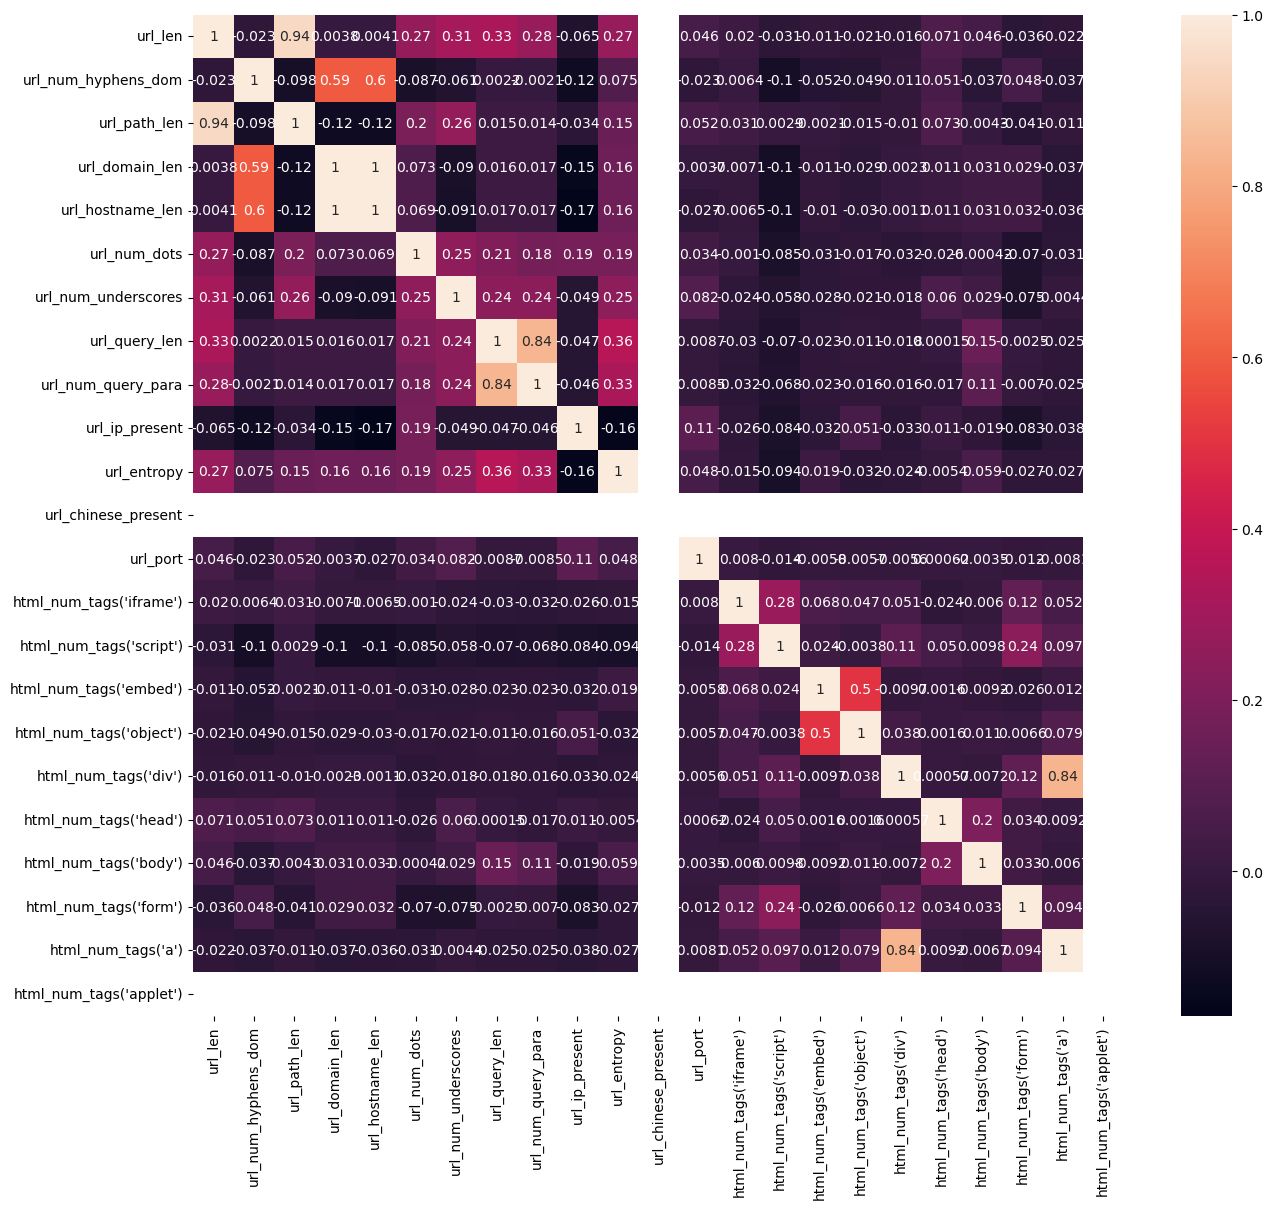

In [257]:
plt.figure(figsize=(15, 13))
sns.heatmap(train.corr(), annot = True)
plt.show()

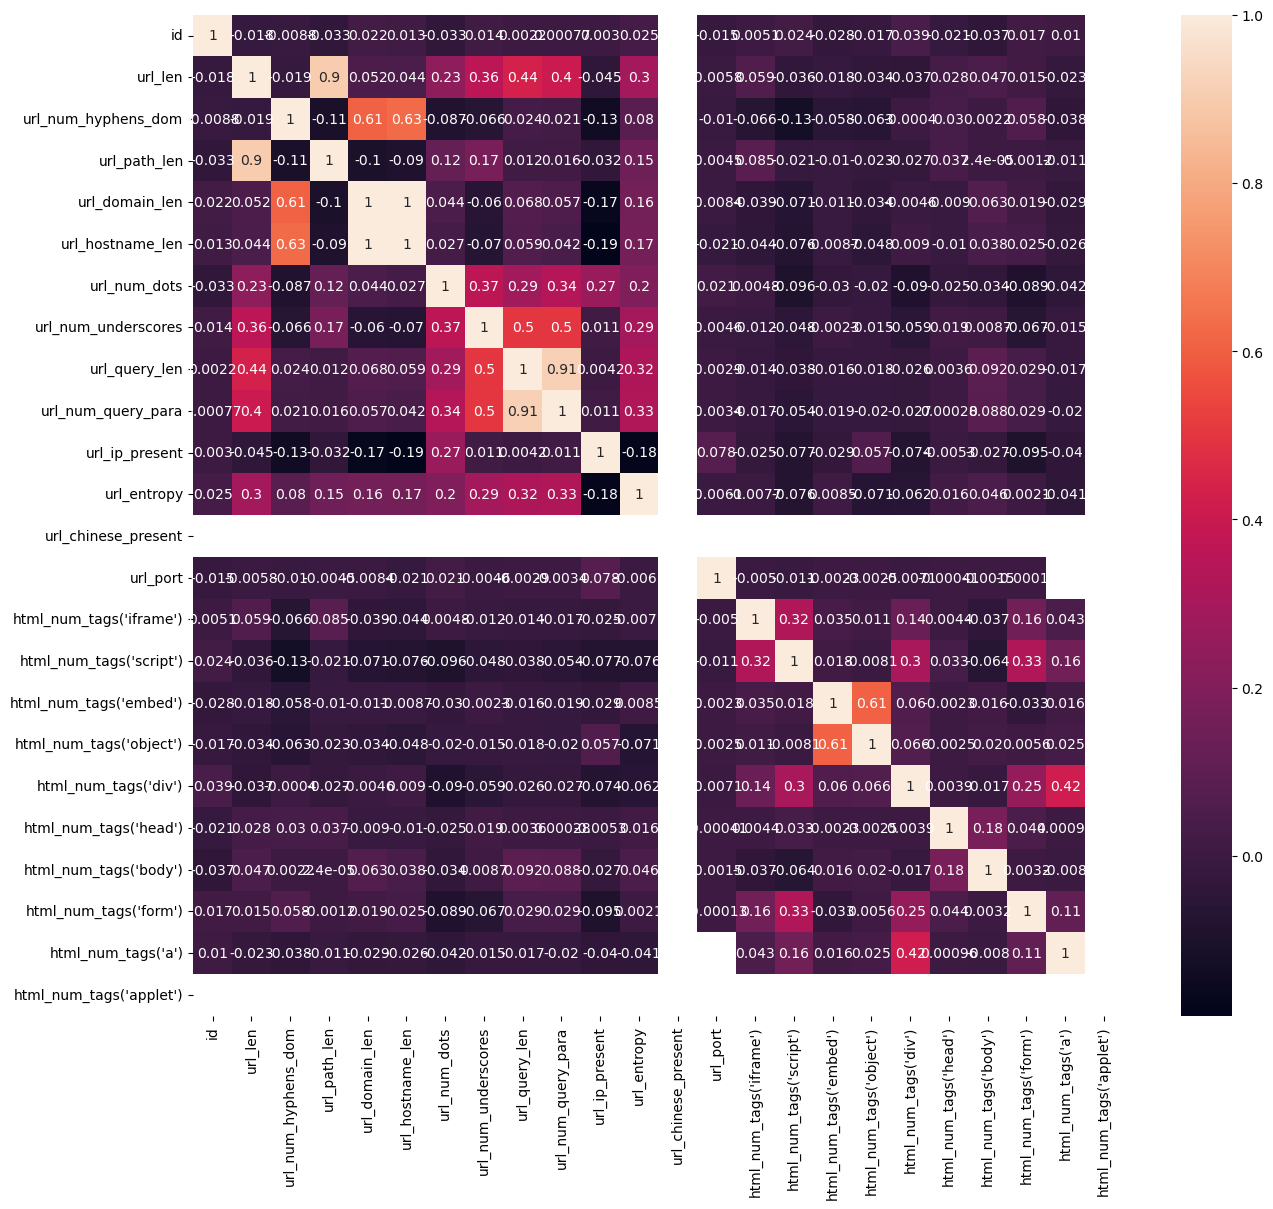

In [238]:
plt.figure(figsize=(15, 13))
sns.heatmap(test.corr(), annot = True)
plt.show()

## <b>Q2. 데이터 이변량 분석하기

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

# <b>Step 2. 데이터 전처리
---

## <b>Q3. 중복 데이터 제거
### 우리가 접속하는 대부분의 웹사이트는 정상 사이트입니다.
### 또한, 특정 몇 개 사이트(ex. google, instagram, facebook 등)에 접속 빈도가 높습니다.
### 편중된 데이터는 모델 학습에 안 좋은 영향을 주기 때문에 중복 데이터 제거를 통해 해결합니다.
### 이 과정은 데이터 전처리 시 반드시 해야 하는 과정은 아니며, 프로젝트/데이터 성격에 맞게 결정하시면 됩니다.

### <span style="color:darkred">[문제1] df info()를 통해 데이터를 확인하고 중복된 데이터는 삭제해주세요. 삭제 후 info()를 통해 이전 데이터와 비교해 보세요.<span>

---

## <b>Q4. 텍스트와 범주형 특성 처리

### 기계가 데이터를 인식할 수 있도록 텍스트 데이터를 수치형 데이터로 변경합니다.
 - replace() 함수를 이용한 텍스트와 범주형 특성 처리

**<span style="color:green">[참고링크] 공식 Document**</span>

* [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
* [unique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

### <span style="color:darkred">[문제2] series.copy()를 이용하여 'label' column의 데이터를 'label_binary' column으로 복사해보세요.<span>

In [435]:
# series.copy() 로 복사하여 새로운 컬럼을 생성합니다.
label_binary = train['label'].copy()


In [436]:
label_binary

0       malicious
1          benign
2          benign
3          benign
4          benign
          ...    
3659    malicious
3660       benign
3661    malicious
3662       benign
3663       benign
Name: label, Length: 3664, dtype: object

### <span style="color:darkred">[문제3] replace() 함수를 활용하여 'label_binary'의 'benign'은 0으로 'malicious'은 1로 변경해주세요. <br><br> 'label'과 데이터를 비교해 보세요.<span>

In [437]:
# replace() 함수를 사용 텍스트 데이터를 수치형 데이터로 변경합니다.
# label_binary['label'] = label_binary['label'].map({
#     'malicious' : 1,
#     'benign' : 0
# })
label_binary.replace('malicious', 1, inplace = True)
label_binary.replace('benign', 0, inplace = True)

In [438]:
train['label'] = label_binary

In [439]:
train['label'] = pd.to_numeric(train['label'])

In [432]:
train

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label,label_binary
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,0,0
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,0,0
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,0,0
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,1,1
3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0.0,0,0
3661,90.0,1.0,64.0,26.0,26.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,75.0,1.0,1.0,2.0,103.0,0.0,1,1
3662,46.0,0.0,33.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0.0,0,0


---

## <b>Q5. 결측치 처리

### 데이터 수집 과정에서 발생한 오류 등으로 인해 결측치가 포함된 경우가 많습니다.
### 모델링 전에 결측치를 확인하고 이를 정제하는 과정은 필요합니다.

### <span style="color:darkred">[문제4] 결측치의 존재를 확인하고 결측치가 포함된 데이터를 처리해보세요.<span>

---

## <b>Q6. 데이터 탐색을 통해 새로운 변수 추가 혹은 불필요한 변수 제거

### AI모델의 성능 향상을 위해 기존의 변수를 조합해 새로운 변수를 만들어 내기도 하고
### 데이터 분석을 통해 필요없는 변수는 삭제하는 과정이 필요 합니다.

### <span style="color:darkred">[문제5] 상관관계 함수 및 데이터 시각화 등을 활용하며 데이터셋을 분석하고 컬럼을 추가/삭제 해보세요.<span>

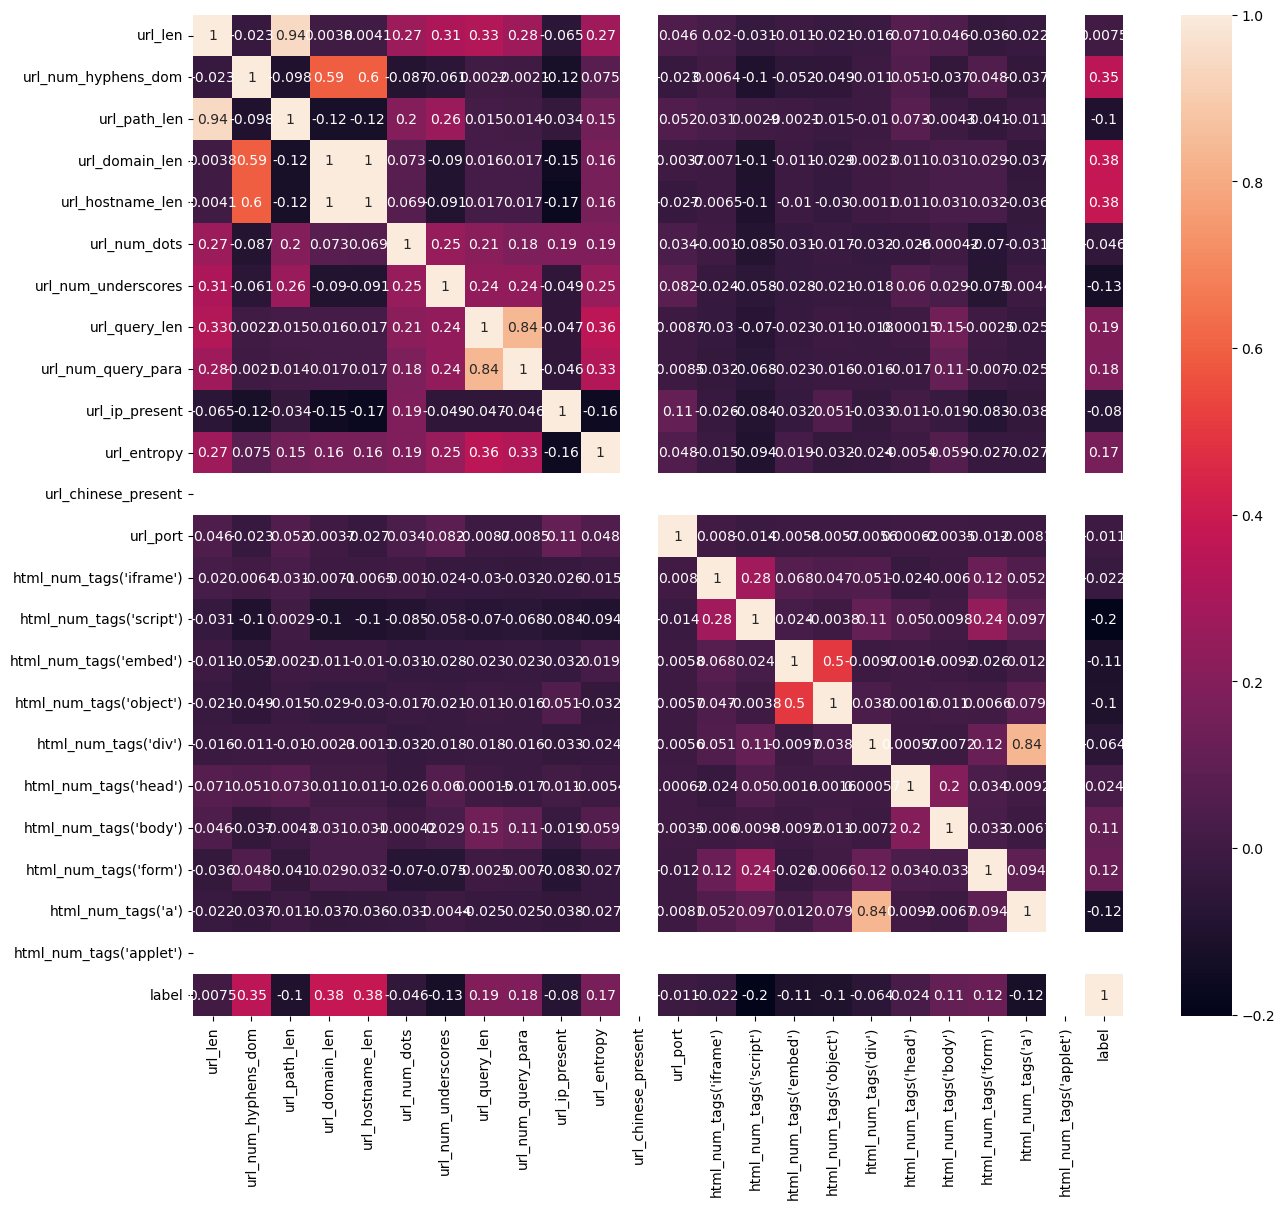

In [310]:
plt.figure(figsize=(15, 13))
sns.heatmap(train.corr(), annot = True)
plt.show()

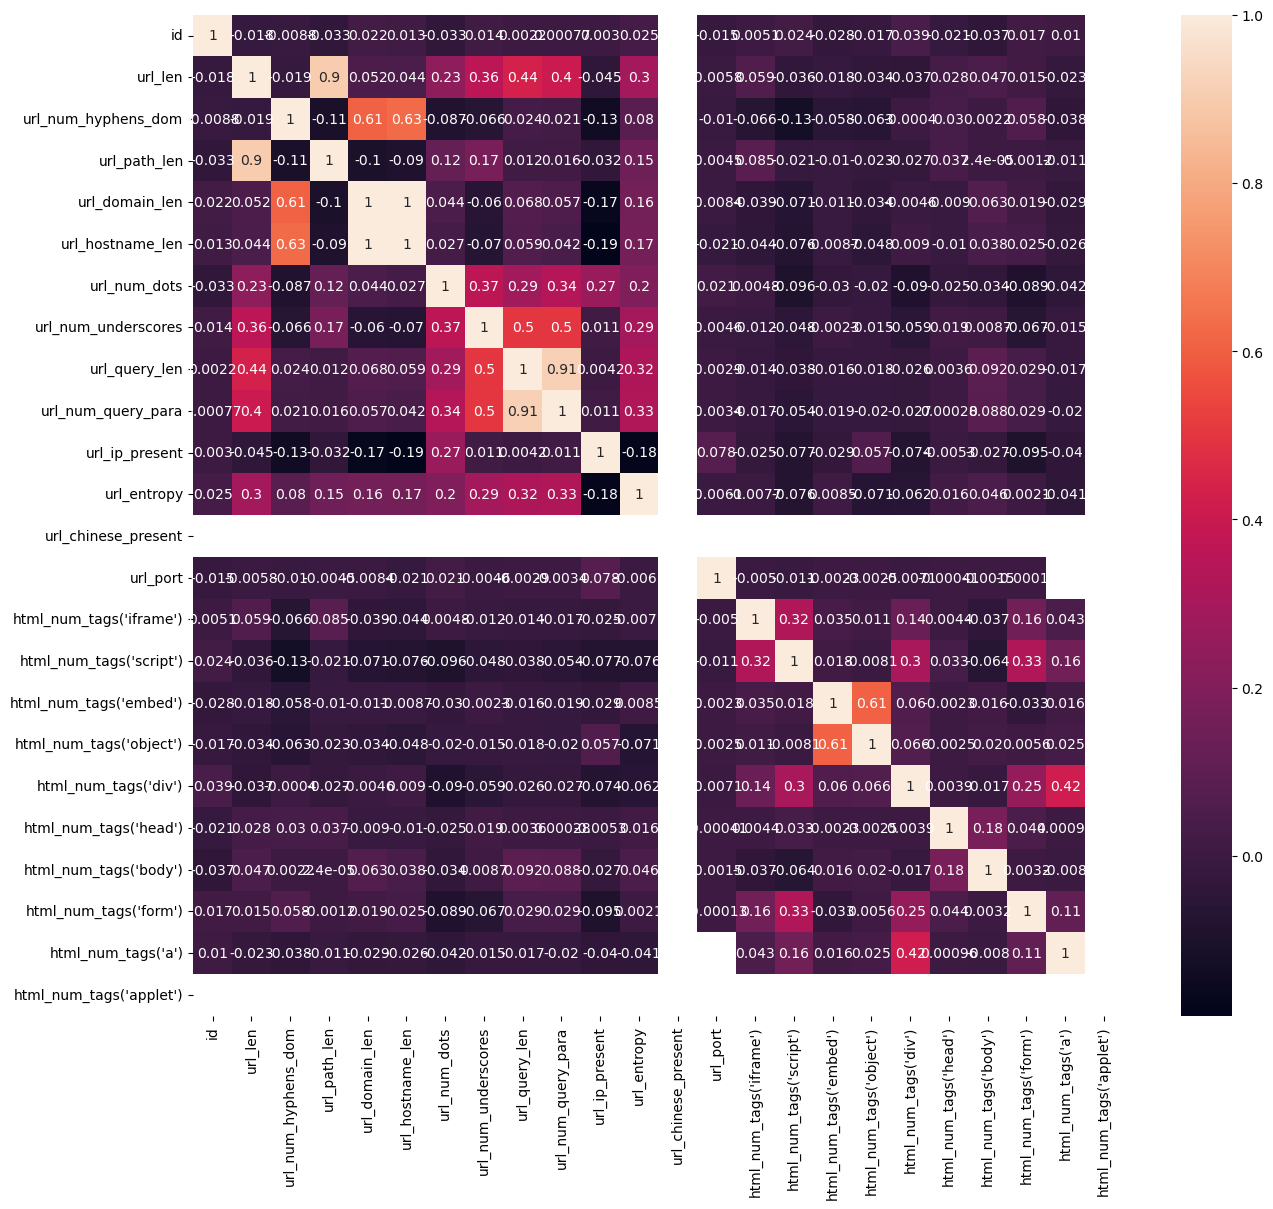

In [246]:
plt.figure(figsize=(15, 13))
sns.heatmap(test.corr(), annot = True)
plt.show()

---

## <b>Q7. train_test_split을 이용하여, train_x, test_x, train_y, test_y로 데이터 분리

### 모델을 학습하는 데에는 Train 데이터만 사용해야 합니다.
### 학습에 사용하지 않은 데이터를 통해 모델을 평가해야 합니다.
### 그러기 위해 Train / Test 데이터로 분리합니다.


**<span style="color:green">[참고링크] 공식 Document**</span>

* train_test_split(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

---

In [247]:
train.columns

Index(['url_len', 'url_num_hyphens_dom', 'url_path_len', 'url_domain_len',
       'url_hostname_len', 'url_num_dots', 'url_num_underscores',
       'url_query_len', 'url_num_query_para', 'url_ip_present', 'url_entropy',
       'url_chinese_present', 'url_port', 'html_num_tags('iframe')',
       'html_num_tags('script')', 'html_num_tags('embed')',
       'html_num_tags('object')', 'html_num_tags('div')',
       'html_num_tags('head')', 'html_num_tags('body')',
       'html_num_tags('form')', 'html_num_tags('a')',
       'html_num_tags('applet')', 'label'],
      dtype='object')

In [248]:
# print(train.drop(labels=['url_path_len', 'url_num_dots',
#                          'url_num_underscores', 'url_ip_present', 'url_port', 'html_num_tags('iframe')',
#                          'html_num_tags('script')', 'html_num_tags('embed')',
#                          'html_num_tags('object')',
#                          'html_num_tags('head')', 'html_num_tags('a')',
#                          'html_num_tags('applet')'], axis=1))
# train.drop(labels=['url_path_len', 'url_num_dots', 'url_num_underscores', 'url_ip_present', 'url_port'], axis=1, inplace = True)

In [249]:
# train.drop(labels=["html_num_tags('iframe')", "html_num_tags('script')", "html_num_tags('embed')",
#                          "html_num_tags('object')", "html_num_tags('head')", "html_num_tags('a')",
#                          "html_num_tags('applet')"], axis=1, inplace = True)

In [400]:
train.isnull().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
label_binary               0
dtype: int64

In [398]:
test.columns

Index(['id', 'url_len', 'url_num_hyphens_dom', 'url_path_len',
       'url_domain_len', 'url_hostname_len', 'url_num_dots',
       'url_num_underscores', 'url_query_len', 'url_num_query_para',
       'url_ip_present', 'url_entropy', 'url_chinese_present', 'url_port',
       'html_num_tags('iframe')', 'html_num_tags('script')',
       'html_num_tags('embed')', 'html_num_tags('object')',
       'html_num_tags('div')', 'html_num_tags('head')',
       'html_num_tags('body')', 'html_num_tags('form')', 'html_num_tags('a')',
       'html_num_tags('applet')'],
      dtype='object')

In [252]:
# test.drop(labels=['url_path_len', 'url_num_dots', 'url_num_underscores', 'url_ip_present', 'url_port',], axis=1, inplace = True)

In [253]:
# test.drop(labels=["html_num_tags('iframe')", "html_num_tags('script')", "html_num_tags('embed')",
#                          "html_num_tags('object')", "html_num_tags('head')", "html_num_tags('a')",
#                          "html_num_tags('applet')"], axis=1, inplace = True)

In [374]:
train.isnull().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
dtype: int64

In [401]:
test.isnull().sum()
# url_domain_len 정규 -> 평균값
# url_domain_len 정규 -> 평균값


id                         0
url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
dtype: int64

In [440]:
train['url_path_len'].fillna(train['url_path_len'].mean(), inplace = True)
train['url_domain_len'].fillna(train['url_domain_len'].mean(), inplace = True)

test['url_path_len'].fillna(test['url_path_len'].mean(), inplace = True)
test['url_domain_len'].fillna(test['url_domain_len'].mean(), inplace = True)
test['url_hostname_len'].fillna(test['url_hostname_len'].mean(), inplace = True)
test["html_num_tags('script')"].fillna(test["html_num_tags('script')"].mean(), inplace = True)
test["html_num_tags('form')"].fillna(test["html_num_tags('form')"].mean(), inplace = True)
test["html_num_tags('a')"].fillna(test["html_num_tags('a')"].mean(), inplace = True)

In [313]:
train.fillna(train.mean(), inplace = True)
test.fillna(test.mean(), inplace = True)

In [196]:
def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where((data > upper_bound)|(data < lower_bound))

### <span style="color:darkred">[문제6] train_test_split 함수를 사용하여 train 데이터와 test 데이터를 분리하고 각각의 shape를 확인하세요<span>

In [441]:
from sklearn.model_selection import train_test_split

In [442]:
x = train.drop(['label'],axis=1)
y = train['label']

In [443]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size=0.2, random_state=2023)

In [444]:
train_x.shape, val_x.shape, train_y.shape, val_y.shape

((2931, 23), (733, 23), (2931,), (733,))

In [203]:
train_x.to_csv("train_x.csv", index = False)
val_x.to_csv("val_x.csv", index = False)
train_y.to_csv("train_y.csv", index = False)
val_y.to_csv("val_y.csv", index = False)

## 모델링

In [274]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [275]:
model = KNeighborsClassifier()

In [276]:
model.fit(train_x, train_y)

KNeighborsClassifier()

In [277]:
# 예측하기
val_y_pred = model.predict(val_x)

In [278]:
print(confusion_matrix(val_y, val_y_pred))
print(classification_report(val_y, val_y_pred))

[[348  25]
 [ 57 303]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       373
           1       0.92      0.84      0.88       360

    accuracy                           0.89       733
   macro avg       0.89      0.89      0.89       733
weighted avg       0.89      0.89      0.89       733



### DecisionTree

In [330]:
DT = DecisionTreeClassifier(random_state=1)

In [331]:
model.fit(train_x, train_y)

KNeighborsClassifier()

In [332]:
# 예측하기
val_y_pred = model.predict(val_x)

In [333]:
print(confusion_matrix(val_y, val_y_pred))
print(classification_report(val_y, val_y_pred))

[[348  25]
 [ 57 303]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       373
           1       0.92      0.84      0.88       360

    accuracy                           0.89       733
   macro avg       0.89      0.89      0.89       733
weighted avg       0.89      0.89      0.89       733



### RandomForest

In [553]:
RF = RandomForestClassifier(n_estimators =1000, max_features = 5, max_depth = 50, random_state=1)

In [554]:
RF.fit(train_x, train_y)

RandomForestClassifier(max_depth=50, max_features=5, n_estimators=1000,
                       random_state=1)

In [555]:
# 예측하기
val_y_pred = RF.predict(val_x)

In [556]:
print(confusion_matrix(val_y, val_y_pred))
print(classification_report(val_y, val_y_pred))

[[360  13]
 [ 21 339]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       373
           1       0.96      0.94      0.95       360

    accuracy                           0.95       733
   macro avg       0.95      0.95      0.95       733
weighted avg       0.95      0.95      0.95       733



In [557]:
print('예측 정확도: {:.4f}'.format(accuracy_score(val_y, val_y_pred)))

예측 정확도: 0.9536


In [558]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 1000],
           'max_depth' : [6, 8, 10, 12, 14, 16],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 10, n_jobs = -1)
grid_cv.fit(train_x, train_y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12, 14, 16],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [10, 1000]})

In [559]:
rf_clf1 = RandomForestClassifier(n_estimators = 1000, 
                                max_depth = 16,
                                min_samples_leaf = 8,
                                min_samples_split = 8,
                                random_state = 0,
                                n_jobs = -1)
rf_clf1.fit(train_x, train_y)
pred = rf_clf1.predict(val_x)
print('예측 정확도: {:.4f}'.format(accuracy_score(val_y, pred)))

예측 정확도: 0.9345


In [560]:
# test.drop('id', axis=1, inplace = True)

KeyError: "['id'] not found in axis"

In [322]:
test.isnull().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
dtype: int64

In [323]:
x_test = test
y_pred = RF.predict(x_test)

In [324]:
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [325]:
test = pd.read_csv("test.csv")

In [326]:
df=pd.DataFrame()
df['id']= test['id']
df['expected'] = y_pred.reshape(-1)
df

,id,expected
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
2436,2436,0
2437,2437,1
2438,2438,0
2439,2439,1


In [327]:
df = df.replace({'expected': {0: 'benign', 1: 'malicious'}})
df

,id,expected
0,0,benign
1,1,benign
2,2,benign
3,3,malicious
4,4,benign
...,...,...
2436,2436,benign
2437,2437,malicious
2438,2438,benign
2439,2439,malicious


In [328]:
df.to_csv('test_pred.csv', index=False)

In [329]:
test_pred = pd.read_csv("test_pred.csv")
test_pred

,id,expected
0,0,benign
1,1,benign
2,2,benign
3,3,malicious
4,4,benign
...,...,...
2436,2436,benign
2437,2437,malicious
2438,2438,benign
2439,2439,malicious


## 딥러닝

In [378]:
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

In [511]:
train_x.shape, train_y.shape

((2931, 23), (2931,))

In [496]:
# 1번 세션 클리어
keras.backend.clear_session()
# 2번 모델 선언
model = keras.models.Sequential()
# 3번 모델 조립
model.add(keras.layers.Input(shape=(23)) )
model.add(keras.layers.Flatten() )
model.add(keras.layers.Dense(256, activation='relu') )
model.add(keras.layers.Dense(128, activation='relu') )
model.add(keras.layers.Dense(64, activation='relu') )
model.add(keras.layers.Dense(64, activation='relu') )
model.add(keras.layers.Dense(32, activation='relu') )
model.add(keras.layers.Dense(1, activation='sigmoid') )
# 4번 컴파일
model.compile(loss='binary_crossentropy', metrics=['accuracy'],
              optimizer='adam')
# 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 23)                0         
                                                                 
 dense (Dense)               (None, 256)               6144      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 3

In [512]:
# 세션 클리어
keras.backend.clear_session()

# 레이어 엮기
il_se = keras.layers.Input(shape=(23,))
il_pe = keras.layers.Input(shape=(23,))

hl_se = keras.layers.Dense(46, activation='relu', name='hl_sepal')(il_se)
hl_pe = keras.layers.Dense(46, activation='relu', name='hl_petal')(il_pe)
hl_pe = keras.layers.Dense(92, activation='relu', name='hl_petal')(il_pe)
hl_pe = keras.layers.Dense(92, activation='relu', name='hl_petal')(il_pe)
hl_pe = keras.layers.Dense(184, activation='relu', name='hl_petal')(il_pe)

add_l = keras.layers.Add()([hl_se, hl_pe])
ol = keras.layers.Dense(1, activation='sigmoid')(add_l)

# 모델 시작 끝 지정
model = keras.models.Model([il_se, il_pe], ol)

# 컴파일
model.compile(loss='binary_crossentropy', metrics=['accuracy'],
              optimizer='adam')

# 요약
model.summary()

ValueError: Inputs have incompatible shapes. Received shapes (46,) and (184,)

In [497]:
from tensorflow.keras.callbacks import EarlyStopping

In [498]:
es = EarlyStopping(monitor='val_loss',         # 관측 대상
                   min_delta=0,                # 임계값
                   patience=10,                 # 임계값 이상으로 변하지 않을때 몇 번 더 지켜볼래
                   restore_best_weights=True)  # 최적의 epoch 가중치를 적용!

In [499]:
history = model.fit(train_x, train_y, epochs=1000, verbose=1,
                    callbacks=[es], validation_split=0.1)

Epoch 1/1000
83/83 [==============================] - 1s 3ms/step - loss: 0.5905 - accuracy: 0.7323 - val_loss: 0.5406 - val_accuracy: 0.7891
Epoch 2/1000
83/83 [==============================] - 0s 2ms/step - loss: 0.4971 - accuracy: 0.7793 - val_loss: 0.4916 - val_accuracy: 0.7245
Epoch 3/1000
83/83 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8354 - val_loss: 0.3736 - val_accuracy: 0.8401
Epoch 4/1000
83/83 [==============================] - 0s 2ms/step - loss: 0.3504 - accuracy: 0.8513 - val_loss: 0.4049 - val_accuracy: 0.8537
Epoch 5/1000
83/83 [==============================] - 0s 2ms/step - loss: 0.3385 - accuracy: 0.8707 - val_loss: 0.2916 - val_accuracy: 0.8844
Epoch 6/1000
83/83 [==============================] - 0s 2ms/step - loss: 0.2978 - accuracy: 0.8878 - val_loss: 0.2714 - val_accuracy: 0.8878
Epoch 7/1000
83/83 [==============================] - 0s 2ms/step - loss: 0.2947 - accuracy: 0.8840 - val_loss: 0.2913 - val_accuracy: 0.8912
Epoch 

In [487]:
y_pred = model.predict(x_test)

77/77 [==============================] - 0s 763us/step


In [488]:
y_pred

array([[9.5965320e-01],
       [5.7350528e-01],
       [3.0005971e-04],
       ...,
       [9.4530445e-01],
       [9.6954125e-01],
       [9.2505097e-01]], dtype=float32)

In [489]:
n_y_pred = np.round(y_pred, 0)

In [490]:
n_y_pred

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [491]:
df=pd.DataFrame()
df['id']= test['id']
df['expected'] = n_y_pred.reshape(-1)
df

,id,expected
0,0,1.0
1,1,1.0
2,2,0.0
3,3,1.0
4,4,0.0
...,...,...
2436,2436,0.0
2437,2437,0.0
2438,2438,1.0
2439,2439,1.0


In [429]:
df.isnull().sum()

id          0
expected    0
dtype: int64

In [492]:
df['expected'] = pd.to_numeric(df['expected'])
print(df.round(0))

        id  expected
0        0       1.0
1        1       1.0
2        2       0.0
3        3       1.0
4        4       0.0
...    ...       ...
2436  2436       0.0
2437  2437       0.0
2438  2438       1.0
2439  2439       1.0
2440  2440       1.0

[2441 rows x 2 columns]


In [493]:
df = df.replace({'expected': {0.0: 'benign', 1.0: 'malicious'}})
df

,id,expected
0,0,malicious
1,1,malicious
2,2,benign
3,3,malicious
4,4,benign
...,...,...
2436,2436,benign
2437,2437,benign
2438,2438,malicious
2439,2439,malicious


In [494]:
df.to_csv('test_pred.csv', index=False)

In [495]:
test_pred = pd.read_csv("test_pred.csv")
test_pred

,id,expected
0,0,malicious
1,1,malicious
2,2,benign
3,3,malicious
4,4,benign
...,...,...
2436,2436,benign
2437,2437,benign
2438,2438,malicious
2439,2439,malicious


In [388]:
train.head()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,0
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,0
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,0
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,0
